# Face Recognition using k-Nearest Neighbor

---

### Contents
<ol>
    <li><a href="#data-preprocessing" style="color: currentColor">Data Preprocessing</a></li>
    <li><a href="#pca" style="color: currentColor">Principal Component Analysis</a></li>
    <li><a href="#knn" style="color: currentColor">kNN-Algorithm</a></li>
    <li><a href="#testing" style="color: currentColor">Model Testing</a></li>
    <li><a href="#accuracy" style="color: currentColor">Accuracy Evaluation</a></li>
    <li><a href="#further-analysis" style="color: currentColor">Further Analysis</a></li>
</ol>
<br>

---

### Libraries

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import sys
sys.path.append(os.path.abspath("../functions"))

import preprocessing
import pca
import knn

---

## <a id="pca"></a> 1. Data Preprocessing

---

## <a id="pca"></a> 2. Pricinpal Component Analysis

Total training images: 120
Total testing images: 45
Training data shape: (120, 77760)
Testing data shape: (45, 77760)
First training image: Mean ≈ 21.3948
Explained variance ratio by first 15 components:
 [0.30838567 0.14261201 0.08246464 0.06781678 0.04963234 0.04237121
 0.02893993 0.02613244 0.02113531 0.01904103 0.01321764 0.01131097
 0.01032818 0.0094519  0.00861723]

Variance captured by the first 100 components: 97.37%
Succesfully transformed Matrix from (120, 77760) to (120, 100)

Succesfully transformed Matrix from (45, 77760) to (45, 100)



Text(0.5, 1.0, 'Variance Explained by Principal Components')

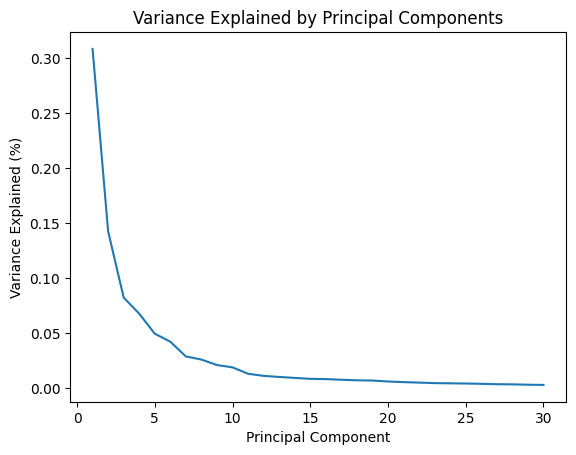

In [17]:
train_centered, test_centered, test_indices = preprocessing.preprocess_data()

train_projection_matrix, singular_values, train_variance_values, eigenvalues = pca.svd_for_pca(train_centered, n_components=100)

train_pca_matrix = pca.PCA(train_projection_matrix, train_centered)

test_pca_matrix = pca.PCA(train_projection_matrix, test_centered)


x_axis = np.arange(1, 31)
train_variance_values = train_variance_values[:30]

plt.plot(x_axis, train_variance_values)
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained (%)")
plt.title("Variance Explained by Principal Components")

---

## <a id="knn"></a> 3. kNN-Algorithm

In [14]:
training_labels = np.array([(i // 8) + 1 for i in range(165)])

prediction = knn.kNN_predict(train_pca_matrix, test_pca_matrix, training_labels, k = 3)

print("Predicted labels for test images:", prediction)

Predicted labels for test images: [np.int64(1), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(1), np.int64(3), np.int64(3), np.int64(1), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(3), np.int64(3), np.int64(1), np.int64(3), np.int64(3), np.int64(1), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(3), np.int64(1), np.int64(3), np.int64(3), np.int64(3), np.int64(1), np.int64(2), np.int64(2), np.int64(2), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(1), np.int64(3), np.int64(1), np.int64(2), np.int64(2)]


---

## <a id="testing"></a> 4. Model Testing

---

## <a id="accuracy"></a> 5. Accuracy Evaluation

---

## <a id="further-analysis"></a> 6. Further Analysis